# Transformations in 2D and 3D

F. Estrada - CSC D18 - Computer Graphics, Fall 2019

---

This script needs to use several different transformations to work. Matlab only lets you define functions in a new file, so the following few cells create files which implement different types of transforms (scaling, rotations, translation). **You must run these cells the first time to generate the files**.

---

*NOTE:* All the following transformations return both the transformed vector as well as the transformation matrix. Their input is the 3D homogeneous vector `x` (4x1) as well as either:

 - An angle of rotation `th` in radians (positive is CCW),
 - A 3D homogeneous scaling vector `s`, or
 - A 3D homogeneous translation vector `t`

#### 3D Rotation around the X axis:

In [ ]:
%%file Rx.m

function [x_rx, Mrx] = Rx(x, th)

  Mrx = [ 1,    0   ,     0   , 0,
          0, cos(th), -sin(th), 0,
          0, sin(th),  cos(th), 0,
          0,    0   ,     0   , 1];
     
  x_rx = Mrx * x;

#### 3D Rotation around the Y axis:

In [ ]:
%%file Ry.m

function [x_ry, Mry] = Ry(x, th)

  Mry = [ cos(th), 0, sin(th), 0,
             0   , 1,    0   , 0,
         -sin(th), 0, cos(th), 0,
             0   , 0,    0   , 1];
     
  x_ry = Mry * x;

#### 3D Rotation around the Z axis:

In [ ]:
%%file Rz.m

function [x_rz, Mrz] = Rz(x, th)

  Mrz = [ cos(th), -sin(th), 0, 0,
          sin(th),  cos(th), 0, 0,
             0   ,     0   , 1, 0,
             0   ,     0   , 0, 1];
     
  x_rz = Mrz * x;

#### 3D Scaling:

In [ ]:
%%file S.m

function [x_s, Ms] = S(x, s)

  Ms = [s(1),  0  ,  0  , 0,
         0  , s(2),  0  , 0,
         0  ,  0  , s(3), 0,
         0  ,  0  ,  0  , 1];
     
  x_s = Ms * x;

#### 3D Translation:

In [ ]:
%%file T.m

function [x_t, Mt]=T(x,t)

  Mt = [ 1, 0, 0, t(1),
         0, 1, 0, t(2),
         0, 0, 1, t(3),
         0, 0, 0,  1  ];
     
  x_t = Mt*x;

Keep in mind that that all transformations above work on 3D homogeneous coordinates (as discussed in lecture), so to work with 2D points, we pass these scripts a set of 3D points with the Z coordinates all set to zero.

---

Let's start with a 2D box - We will start with a list of values for $x$ and $y$, in $[0,1]$ in increments of $.01$ :

In [6]:
x = [0:.01:1]';  % The ' after the vector transposes it.
y = [0:.01:1]';

The code below makes a box with corners $(0,0) - (0,1) - (1,1) - (1,0)$. Note that since we have 3D transform functions, we're going to take advantage of the fact that 2D points are just 3D points with $z = 0$. So in the array below:
 - The first column contains $x$ values,
 - The second column contains $y$ values,
 - The third column is all zeros (corresponding to $z=0$ for all points) and
 - The last column is all ones (corresponding to the homogeneous coordinate $w=1$)

In [7]:
% This has 2 columns, for the (x,y) coordinates of 
% each point (one point per row). Print this out to
% see what it looks like!

box = [         x          ,  zeros(length(x), 1),
        zeros(length(y), 1),           y         ,
                x          ,   ones(length(x), 1),
         ones(length(y), 1),           y         ];

% Adds a 0 for the z coordinate at each point
box(:, end+1) = zeros(length(box), 1);   

% Adds a column of 1s for the homogeneous coord. w.                                                   
box(:, end+1) = ones(length(box), 1);    

So at this point, we have an array called `box`, with one point per row, and each point has coordinates `[x, y, 0, 1]` - let's plot it:

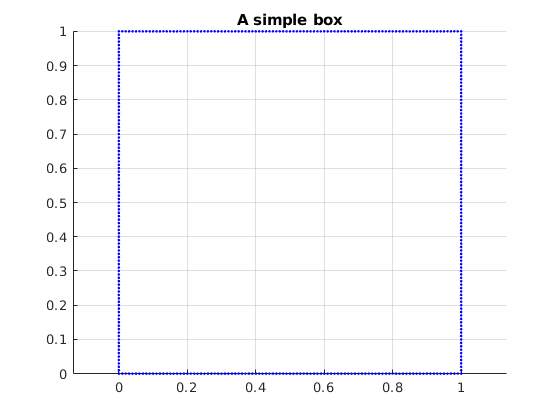

In [8]:
%plot inline
axis equal; hold on; grid on; title('A simple box');

plot(box(:,1),box(:,2),'b.');

---

Now, let's transform this box a bit! For our first example: 
 - Scale the box by $(2,1)$ (make it a chubby rectangle), then rotate it by $\displaystyle\frac{\pi}{4}$ radians, and then translate it to $(3,2)$ - in that order

In [9]:
bT = S(box', [2 1 1 1]');  % First, Scale!

The line above requires a bit of explanation - `bT` will contain the transformed points (like `box`, this has one point per row, with coordinates `[q, r, 0, 1]`, where `q` corresponds to the transformed $x$ coordinate of the corresponding point in `box`, and `r` is the transformed $y$ coordinate from the corresponding box in `box`.

Note, however, that we pass `box'` (the transpose of the `box` array) to the scaling function. Why? because homogeneous transformations work as follows:

$$q = Ap$$  

where $p$ and $q$ are homogeneous 3D **column** vectors, and $A$ is the $4\times4$ homogeneous transform matrix. $p$ has to be a column vector for the matrix multiplication to work! But `box` stores points in **rows**. So we have to transpose it.



Now, after the line above, `bT` has a scaled box, so we rotate it. Rotate it on the $XY$ plane. This is the same as rotating around the $Z$ axis in 3D:

In [10]:
bT = Rz(bT, pi/4);  % Second, rotate around Z!

Now `bT` has a scaled, rotated box. Translate it to the desired spot:

In [11]:
bT = T(bT, [3 2 0 1]'); % Translate!

We're done! Let's plot the original box (in blue) and transformed box (in red) to see the result:

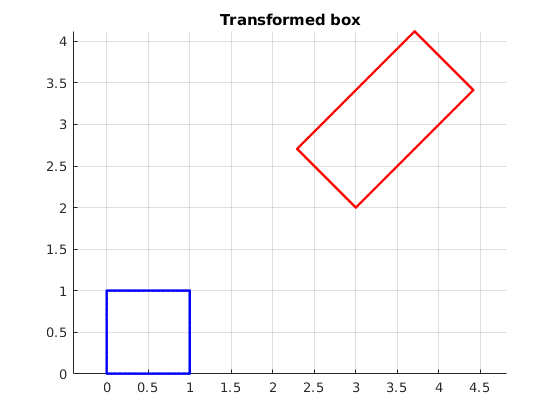

In [12]:
%plot inline
axis equal; hold on; grid on; title('Transformed box');

plot(box(:,1), box(:,2), 'b.');
plot(bT(1,:), bT(2,:), 'r.');   % Remember that bT is transposed!

Make sure you're happy with how the transformations above played out, change them if you like and try different scaling factors, rotations angles, and translations!

---

Second example - showing that the order of transformations matters! 

- Same transformstions as above, but apply : Scale, Translate, Rotate

*Note that here the translation is done before we rotate - We talked about it in lecture!*

In [13]:
bT2 = S(box', [2 1 1 1]');  % Scale
bT2 = T(bT2, [3 2 0 1]');   % Translate
bT2 = Rz(bT2, pi/4);        % Rotate

Let's plot all three boxes now and see how the results are different:

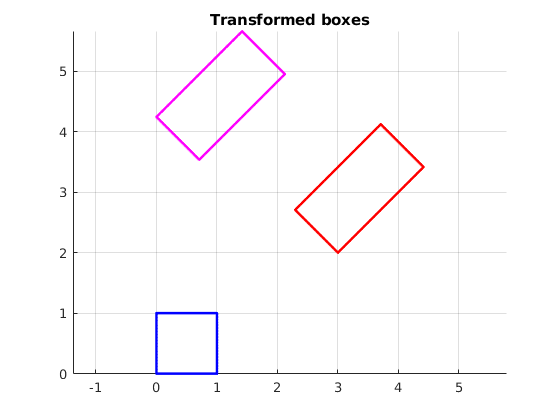

In [14]:
%plot inline
axis equal; hold on; grid on; title('Transformed boxes');

plot(box(:,1), box(:,2), 'b.');
plot(bT(1,:), bT(2,:), 'r.');
plot(bT2(1,:), bT2(2,:), 'm.');

---
# Exercises
---

### Exercise 1
---

From the starting box, set up a sequence of transformations that transforms the box into an elongated diamond shape (twice as wide as it is tall), and located $4$ units away from the origin along a line $135$ degrees away from horizontal (i.e. if we draw the line away from the origin, at $135$ degrees, the center of the diamond is on this line, and the diamond's major axis is ALIGNED with this line). Plot it in any color you like.

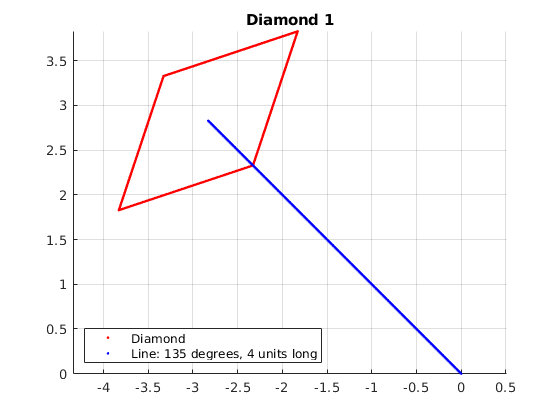

In [17]:
%plot inline
axis equal; hold on; grid on; title('Diamond 1');

% TODO: finish this!

---
### Exercise 2
---

Do the same as the above, only now the diamond's major axis should remain aligned with the $X$ axis (i.e. the shape itself should not be rotated to align with the line at $135$ degrees from the axis.

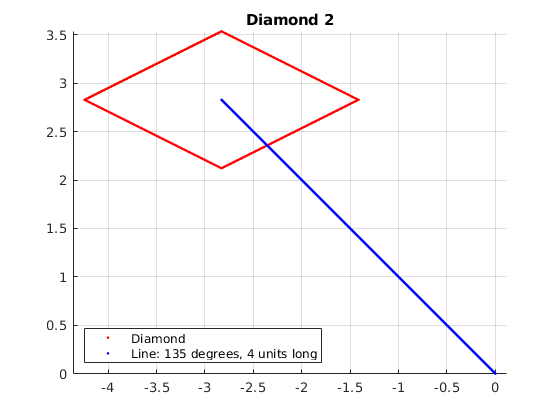

In [18]:
%plot inline
axis equal; hold on; grid on; title('Diamond 2');

% TODO: finish this!

---

### Exercise 3

---

Use a set of elongated diamonds to plot a star with 4, 6, 8, etc. points (we should be able to select how many by setting the value of `N` below to the right value). You can assume `N` is always even.

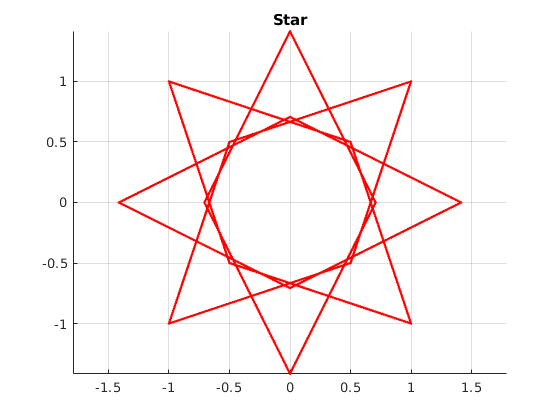

In [19]:
%plot inline
axis equal; hold on; grid on; title('Star');

N = 8; % Number of points in the star (even)

% TODO: finish this!
